In [1]:
from packaging import version
import matplotlib.pyplot as plt
import tensorboard as tb
from scipy import stats
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np

import os
import time

now = time.localtime()
subdir = time.strftime("%d-%b-%Y_%H.%M.%S", now)

summary_dir1 = os.path.join("model_backend",'FSL_LOGS','train')
summary_writer1 = tf.summary.create_file_writer(summary_dir1)

for cont in range(200):
    with summary_writer1.as_default():
        tf.summary.scalar(name="epoch_categorical_accuracy", data=np.math.sin(cont) ,step=cont)
        tf.summary.scalar(name="epoch_loss", data=np.math.sin(cont/2), step=cont)
    summary_writer1.flush()

In [2]:
summary_writer1

#### Loading TensorBoard scalars as a pandas.DataFrame

In [3]:
experiment_id = "Mm0y9p7QT1CNV0yEi1wVYw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,.,epoch_categorical_accuracy,0,0.000000
1,.,epoch_categorical_accuracy,1,0.841471
2,.,epoch_categorical_accuracy,2,0.909297
3,.,epoch_categorical_accuracy,3,0.141120
4,.,epoch_categorical_accuracy,4,-0.756802
...,...,...,...,...
2065,.,epoch_loss,1030,0.000958
2066,.,epoch_loss,1031,0.001102
2067,.,epoch_loss,1032,0.000387
2068,.,epoch_loss,1033,0.000067


In [4]:
print(df["run"].unique())
print(df["tag"].unique())

['.']
['epoch_categorical_accuracy' 'epoch_loss']


#### Getting a pivoted (wide-form) DataFrame

In [5]:
dfw = experiment.get_scalars(pivot=True) 
dfw

,run,step,epoch_categorical_accuracy,epoch_loss
0,.,0,0.000000,1.020378
1,.,1,0.841471,0.479426
2,.,2,0.909297,0.493039
3,.,3,0.141120,0.997495
4,.,4,-0.756802,0.183581
...,...,...,...,...
1030,.,1030,0.999597,0.000958
1031,.,1031,0.999195,0.001102
1032,.,1032,1.000000,0.000387
1033,.,1033,1.000000,0.000067


#### Saving the DataFrame as CSV

In [6]:
csv_path = 'model_backend/fsl_logs.csv'
dfw.to_csv(csv_path, index=False)
dfw_roundtrip = pd.read_csv(csv_path)
pd.testing.assert_frame_equal(dfw_roundtrip, dfw)

#### Performing custom visualization and statistical analysis

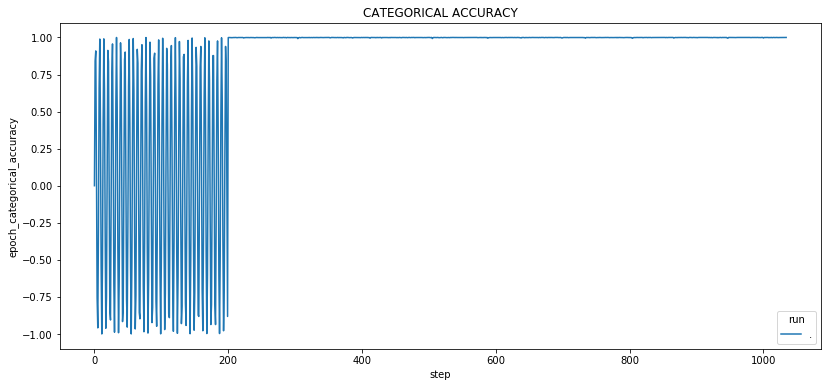

In [13]:
# Filter the DataFrame to only validation data, which is what the subsequent
# analyses and visualization will be focused on.
dfw_validation = dfw[dfw.run.str.endswith(".")]
# Get the optimizer value for each row of the validation DataFrame.
optimizer_validation = dfw_validation.run.apply(lambda run: run.split(",")[0])

plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=dfw_validation, x="step", y="epoch_categorical_accuracy",
             hue=optimizer_validation).set_title("CATEGORICAL ACCURACY")
plt.savefig('accuracy.png')

# plt.subplot(1, 2, 2)
# sns.lineplot(data=dfw_validation, x="step", y="epoch_loss",
#              hue=optimizer_validation).set_title("LOSS")
# plt.savefig('loss.png')

In [14]:
accuracy = dfw['epoch_categorical_accuracy'] #epoch_categorical_accuracy	epoch_loss
loss = dfw['epoch_loss']

In [17]:
correlation = accuracy.corr(loss)
print(correlation)

-0.06750265192814699
